<a href="https://colab.research.google.com/github/kishore-1812/mnist-classification-DeepL-ex-3-/blob/main/Copy_of_Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

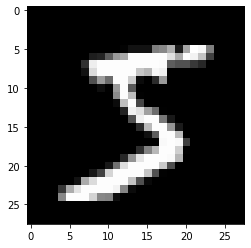

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

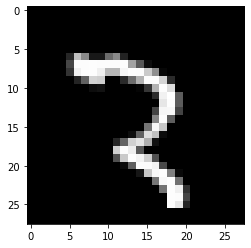

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model = keras.Sequential()
# Write your code here
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(110, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 110)              

In [27]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 57s 60ms/step - loss: 0.1726 - accuracy: 0.9467 - val_loss: 0.0492 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0256 - val_accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0289 - val_accuracy: 0.9901
Epoch 5/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0269 - val_accuracy: 0.9912


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.172570,0.946750,0.049223,0.9847
1,0.054350,0.983167,0.033372,0.9892
2,0.039240,0.988317,0.025634,0.9916
3,0.031172,0.990350,0.028894,0.9901
4,0.024662,0.992250,0.026936,0.9912


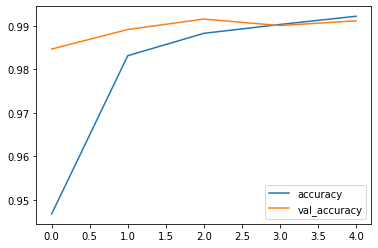

In [31]:
metrics[['accuracy','val_accuracy']].plot()

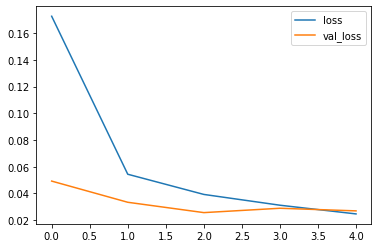

In [32]:
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [34]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    1    1    0    0    0    0    1    1    0]
 [   0 1134    0    0    0    0    0    0    1    0]
 [   1    0 1027    0    1    0    0    3    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  978    0    4    0    0    0]
 [   1    0    1    8    0  879    1    1    1    0]
 [   1    3    0    0    1    2  950    0    1    0]
 [   0    4   11    0    0    0    0 1011    1    1]
 [   2    0    4    1    0    0    1    2  963    1]
 [   0    2    0    3    5    3    1    2    4  989]]


In [35]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [37]:
img = image.load_img('/content/sample_data/test_sample.png')

In [38]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [39]:
img = image.load_img('/content/sample_data/test_sample.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [41]:
print(x_single_prediction)

[0]


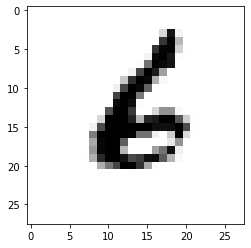

In [42]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [43]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [44]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [45]:
print(x_single_prediction)

[6]
